# ML Assignment Part 2 - Logistic: Submitted by Shubham Murari

In [1]:
import os
from fnmatch import fnmatch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Part 1: Reading the Dataset 'energydata_complete.csv' and Split the data to Train and Test

In [2]:
df_Energy=pd.read_csv('energydata_complete.csv')
df_Energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,1/11/2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,1/11/2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,1/11/2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,1/11/2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,1/11/2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
print('Shape of dataframe is', df_Energy.shape)

Shape of dataframe is (19735, 29)


In [4]:
df_Energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

#### Checking for the Missing Values:

In [5]:
df_Energy.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

#### Checking the statistics of different variables: 

In [6]:
df_Energy.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


### Feature Selection:

#### Analyze the Correlation between different Variables (Plot a Heat Map)

Text(0.5,1,'Heatmap of Variables')

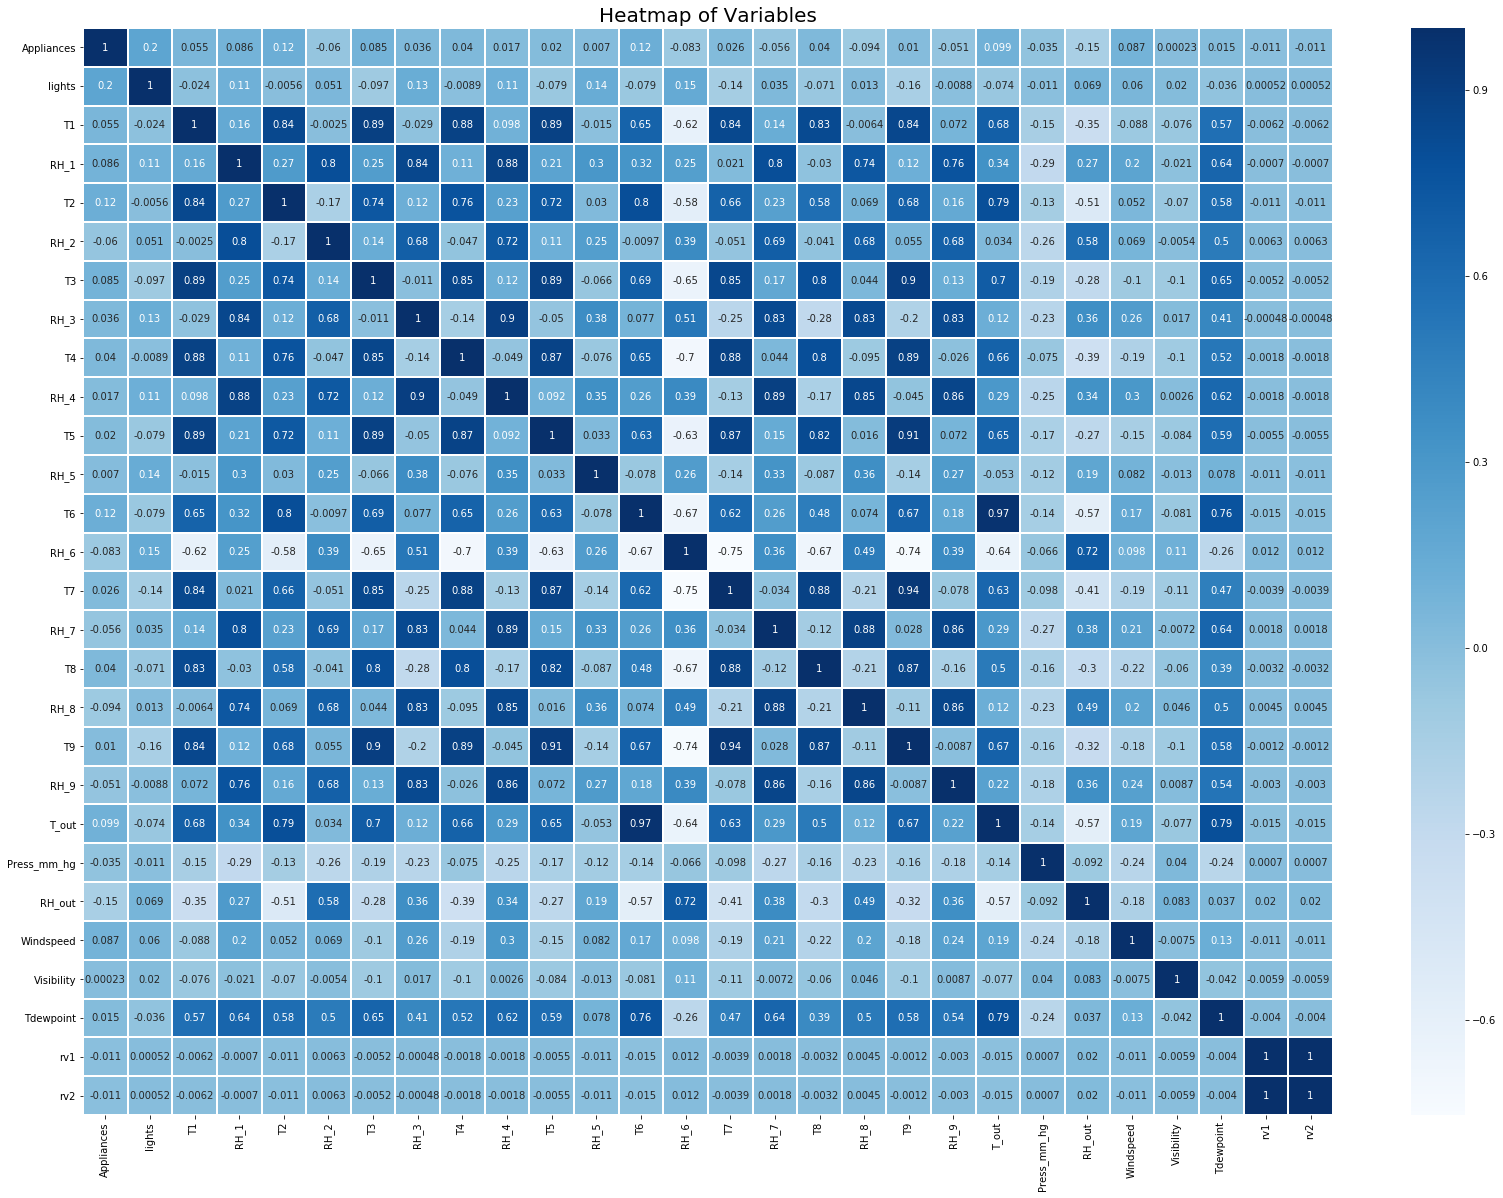

In [7]:
#Correlation:

fig = plt.figure(figsize=(28,20))

axis = sns.heatmap(df_Energy.corr(), cmap= 'Blues', linewidth=1, linecolor='white', annot=True)
axis.set_title('Heatmap of Variables', fontsize=20)

#### Further drill down the Correlation Matrix:

In [8]:
corr_matrix = df_Energy.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol = sol.to_frame()
sol.columns=['corr']
sol[sol['corr'] >  0.8]

,,corr
rv1,rv2,1.000000
T6,T_out,0.974778
T7,T9,0.944776
T5,T9,0.911055
T3,T9,0.901324
RH_3,RH_4,0.898978
RH_4,RH_7,0.894301
T1,T3,0.892402
T4,T9,0.889439
T3,T5,0.888169


In [9]:
#dropping these because of high correlation, and will run the belwo code again
df = df_Energy.drop(columns=['rv2','T9','RH_3','T1','RH_4','T3','T4','RH_7','RH_9','T7'],axis=1)

corr_matrix = df.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol = sol.to_frame()
sol.columns=['corr']
sol[sol['corr'] >  0.8]

,,corr
T6,T_out,0.974778
T5,T8,0.824981
T2,T6,0.801186


In [10]:
#dropping these because of high correlation, and will run the belwo code again
df = df.drop(columns=['T6'],axis=1)

corr_matrix = df.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol = sol.to_frame()
sol.columns=['corr']
sol[sol['corr'] >  0.8]

,,corr
T5,T8,0.824981


In [11]:
# We can also remove the Date Column: 

df = df.drop(columns=['date'],axis=1)

#### So finally removing the highly correlated features, we will left with the following variables:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 17 columns):
Appliances     19735 non-null int64
lights         19735 non-null int64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
RH_6           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 non-null float64
Windspeed      19735 non-null float64
Visibility     19735 non-null float64
Tdewpoint      19735 non-null float64
rv1            19735 non-null float64
dtypes: float64(15), int64(2)
memory usage: 2.6 MB


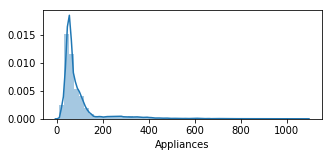

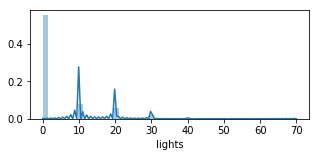

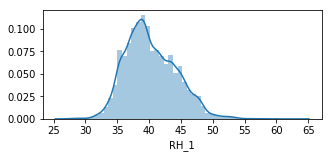

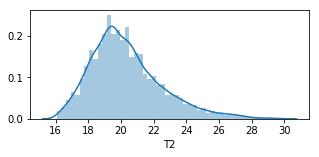

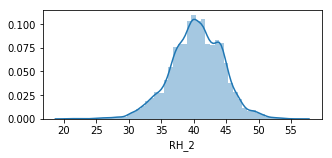

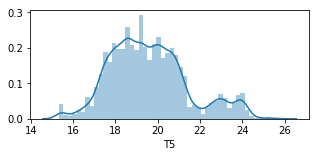

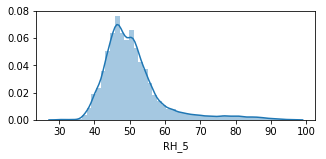

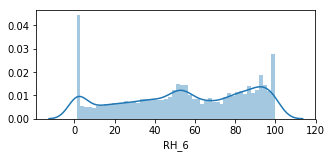

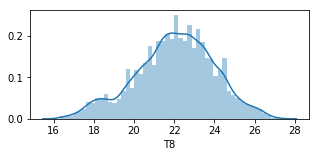

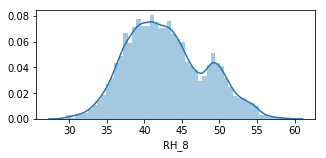

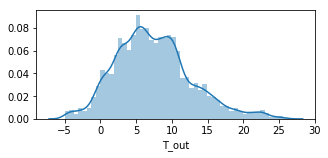

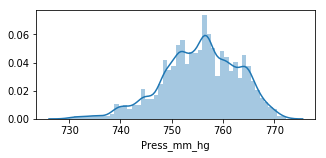

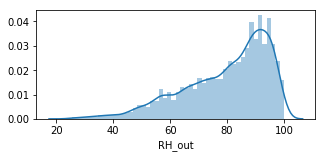

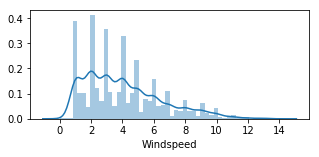

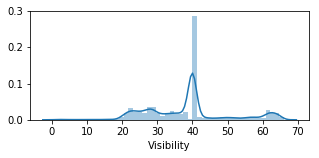

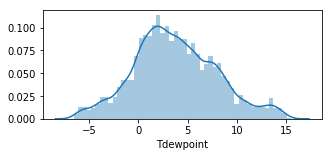

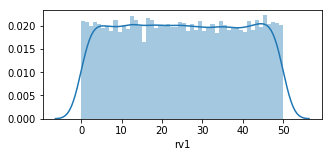

In [13]:
for i in df.columns:
    fig = plt.figure(figsize = (5,2))
    sns.distplot(df[i], kde = True, bins = 50)

In [14]:
df['Appliances_Energy'] = np.where(df['Appliances']>= 60, 1, 0)
df.drop(columns=['Appliances'],axis=1,inplace=True)

### Partitioning dataset using 70/30 split rule 

In [15]:
x = df.drop(columns=['Appliances_Energy'],axis=1)

y = df['Appliances_Energy']

xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [16]:
print('Shape of xTrain Set', xTrain.shape)
print('Shape of yTrain Set', yTrain.shape)

print('')

print('Shape of xTest Set', xTest.shape)
print('Shape of yTest Set', yTest.shape)

Shape of xTrain Set (13814, 16)
Shape of yTrain Set (13814,)

Shape of xTest Set (5921, 16)
Shape of yTest Set (5921,)


In [17]:
xTrain.head()

,lights,RH_1,T2,RH_2,T5,RH_5,RH_6,T8,RH_8,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1
3766,20,44.560000,22.323333,43.526667,19.100000,56.982222,67.960000,21.487222,49.487778,11.60,744.166667,63.333333,9.000000,40.0,4.830,1.257935
9503,10,31.700000,21.000000,31.826667,18.666667,39.700000,14.700000,23.790000,32.663333,10.10,764.533333,49.000000,4.833333,25.5,-0.167,14.358423
10946,0,36.230000,21.356667,36.400000,20.100000,46.223333,20.763333,24.100000,36.530000,12.30,750.100000,55.333333,9.666667,40.0,3.430,22.111894
10393,20,39.163333,20.790000,40.663333,20.790000,43.830000,43.766667,23.790000,39.000000,7.33,756.633333,81.500000,2.000000,40.0,4.400,30.049301
15274,0,41.360000,19.760000,40.830000,19.500000,44.090000,23.690000,22.390000,37.590000,6.70,748.766667,58.666667,6.666667,40.0,-0.900,22.500115


In [18]:
yTrain.head()

3766     1
9503     1
10946    1
10393    1
15274    1
Name: Appliances_Energy, dtype: int32

### Converting the dataframes to the Arrays so that we can further Normalize it

In [19]:
xTrain_matrix=np.array(xTrain)
xTest_matrix=np.array(xTest)
yTrain_vector=np.array(yTrain)
yTest_vector=np.array(yTest)

In [20]:
yTrain_vector.shape

(13814,)

In [21]:
yTest_vector.shape

(5921,)

In [22]:
xTrain_matrix.shape

(13814, 16)

In [23]:
xTest_matrix.shape

(5921, 16)

### Due to varying magnitude of features, we need to perform Feature Normalisation. The method below subtracts the mean and divides the value by standard deviation to scale the values

In [24]:
def normaliseData(X):
    scaler=preprocessing.StandardScaler().fit(X)
    Xnorm=scaler.transform(X)
    return Xnorm

#### Normalising "xTrain" using Standard Scaler

In [25]:
xTrain_matrix=normaliseData(xTrain_matrix)
xTrain_matrix

array([[ 2.04008149,  1.07991298,  0.9157877 , ...,  0.14084505,
         0.25631058, -1.63268062],
       [ 0.77909954, -2.1532799 ,  0.30833191, ..., -1.08682643,
        -0.93966994, -0.73065121],
       [-0.48188242, -1.01437137,  0.47205426, ...,  0.14084505,
        -0.07876501, -0.19678882],
       ...,
       [-0.48188242, -1.04956942, -0.60973728, ..., -1.29849392,
        -0.38511984,  0.34334949],
       [-0.48188242,  0.41114991,  0.21193465, ...,  0.14084505,
         1.10357314,  0.95693127],
       [-0.48188242,  0.87878123,  0.12471808, ...,  0.14084505,
        -0.12663295, -1.26203846]])

#### Normalising "xTest" using Standard Scaler

In [26]:
xTest_matrix=normaliseData(xTest_matrix)
xTest_matrix

array([[-0.47256809, -1.74692654, -0.24619744, ...,  0.14310903,
        -1.5197662 ,  1.17696559],
       [-0.47256809, -0.43891687, -0.39145471, ...,  0.14310903,
        -0.22799251, -0.0281233 ],
       [-0.47256809,  0.28663936, -0.07698021, ...,  0.14310903,
         0.161665  , -1.47573768],
       ...,
       [-0.47256809, -1.14187792, -1.159671  , ...,  1.66010499,
        -0.94425386, -1.27097744],
       [-0.47256809,  0.43978445, -0.07698021, ..., -0.32474954,
        -0.47595638, -1.61447479],
       [-0.47256809, -1.48666358, -0.26117242, ...,  0.14310903,
        -1.88108498,  1.23198812]])

### Part 3: Implementation of Gradient Descent:


#### Add column of ones for bias initialisation

In [27]:
XtrainNorm=np.hstack((np.ones((xTrain_matrix.shape[0],1)),xTrain_matrix))
XtestNorm=np.hstack((np.ones((xTest_matrix.shape[0],1)),xTest_matrix))

#### Normalized Value for xTrain:

In [28]:
XtrainNorm

array([[ 1.        ,  2.04008149,  1.07991298, ...,  0.14084505,
         0.25631058, -1.63268062],
       [ 1.        ,  0.77909954, -2.1532799 , ..., -1.08682643,
        -0.93966994, -0.73065121],
       [ 1.        , -0.48188242, -1.01437137, ...,  0.14084505,
        -0.07876501, -0.19678882],
       ...,
       [ 1.        , -0.48188242, -1.04956942, ..., -1.29849392,
        -0.38511984,  0.34334949],
       [ 1.        , -0.48188242,  0.41114991, ...,  0.14084505,
         1.10357314,  0.95693127],
       [ 1.        , -0.48188242,  0.87878123, ...,  0.14084505,
        -0.12663295, -1.26203846]])

In [29]:
XtrainNorm.shape

(13814, 17)

#### Normalized Value for xTest:

In [30]:
XtestNorm

array([[ 1.        , -0.47256809, -1.74692654, ...,  0.14310903,
        -1.5197662 ,  1.17696559],
       [ 1.        , -0.47256809, -0.43891687, ...,  0.14310903,
        -0.22799251, -0.0281233 ],
       [ 1.        , -0.47256809,  0.28663936, ...,  0.14310903,
         0.161665  , -1.47573768],
       ...,
       [ 1.        , -0.47256809, -1.14187792, ...,  1.66010499,
        -0.94425386, -1.27097744],
       [ 1.        , -0.47256809,  0.43978445, ..., -0.32474954,
        -0.47595638, -1.61447479],
       [ 1.        , -0.47256809, -1.48666358, ...,  0.14310903,
        -1.88108498,  1.23198812]])

In [31]:
XtestNorm.shape

(5921, 17)

#### Transforming the X values into Matrix and transposing the Y matrix for Test and Train

In [32]:
# For TRAIN:

XtrainMatrix= np.matrix(XtrainNorm) 
yTrain = np.matrix(yTrain_vector).T

In [33]:
#For TEST:

XtestMatrix = np.matrix(XtestNorm)  
yTest = np.matrix(yTest_vector).T

In [34]:
yTrain.shape

(13814, 1)

In [35]:
XtrainMatrix.shape

(13814, 17)

### Implementing Sigmoid function

In [37]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

### Implementing Cost Function for Logistic Regression:

In [38]:
def computeCost(X,y,theta):
    predictions = sigmoid(np.dot(X,theta))
    error = -y.T.dot(np.log(predictions)) - ((1-y).T.dot(np.log(1-predictions)))
    return np.sum(error) / (len(y))

### Implementing Gradient Descent for each Iteration for Logistic: Setting a threshold of 0.0000001

In [83]:
def gradientDescent(Xtrain, ytrain,Xtest,ytest, theta, alpha, iters,threshold=0.0000001):
    temp=np.matrix(np.zeros(theta.shape))
    trainCost = np.zeros(iters)
    testCost=np.zeros(iters)
    for i in range(iters):
        predictions = sigmoid(np.dot(Xtest,theta))
        error=sigmoid(np.dot(Xtrain,theta))-ytrain
        grad = (1/len(ytrain))*np.dot(Xtrain.T,error)
        temp=temp -(alpha *grad)    
        theta=temp
        trainCost[i]=computeCost(Xtrain, ytrain, theta)
        testCost[i]=computeCost(Xtest,ytest,theta)
        
        if i!=0 and trainCost[i-1]-trainCost[i]<threshold:
            print('')
            print('Converged in ',str(i),' iterations.')
            break
        
    return theta,trainCost,testCost,predictions

### Implementing the function to plot the Learning Curve:

In [84]:
def plotLearningCurve(trainCost,testCost):
    size=trainCost.size-trainCost[trainCost==0].size-1
    fig, ax = plt.subplots(figsize=(10,8))
    ax.plot(list(range(0,size)), trainCost[0:size], 'r')
    ax.plot(list(range(0,size)), testCost[0:size], 'b')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Training/Testing Cost VS Iterations')

## Experiment 1 (Training the Model for Logistic):

#### For alpha = 0.01

In [87]:
alpha=0.01
iterations=100000
theta=np.zeros((XtrainMatrix.shape[1],1))
theta,trainCost,testCost,predictions= gradientDescent(XtrainMatrix,yTrain,XtestMatrix,yTest,theta,alpha,iterations)
theta


Converged in  16803  iterations.


matrix([[ 0.71988488],
        [ 0.84437593],
        [ 0.93352554],
        [ 0.06468369],
        [-0.44919241],
        [-0.2342916 ],
        [ 0.17574723],
        [ 0.13973184],
        [ 0.68397922],
        [-1.01106127],
        [ 0.11988622],
        [-0.09501772],
        [-0.04366755],
        [ 0.15893172],
        [ 0.01255436],
        [ 0.13010138],
        [ 0.01287189]])

In [88]:
computeCost(XtrainMatrix,yTrain,theta)

0.5208205730204185

In [89]:
computeCost(XtestMatrix,yTest,theta)

0.5309298109413734

### Plotting the Learning Curve

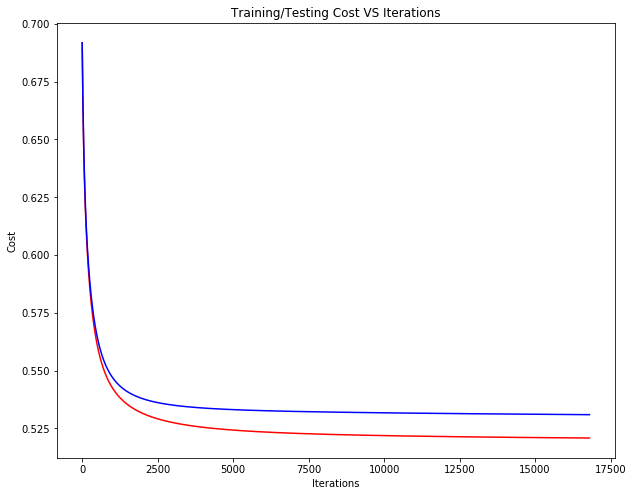

In [90]:
plotLearningCurve(trainCost,testCost)

### Calculating accuracy

In [91]:
predictions

matrix([[0.68900614],
        [0.68513097],
        [0.67331652],
        ...,
        [0.50748058],
        [0.34527463],
        [0.77819334]])

In [92]:
predictions_log = np.where(predictions>=0.5,1,0)
predictions_log

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [98]:
accuracy = np.sum(np.where(predictions_log ==yTest,1,0))/len(yTest)*100
accuracy

73.09576085120757

#### For alpha = 0.1

In [100]:
alpha=0.1
iterations=5000
theta=np.zeros((XtrainMatrix.shape[1],1))
theta,trainCost,testCost,predictions= gradientDescent(XtrainMatrix,yTrain,XtestMatrix,yTest,theta,alpha,iterations)
theta


Converged in  4262  iterations.


matrix([[ 0.72920923],
        [ 0.84133868],
        [ 1.21348642],
        [-0.15747821],
        [-0.74644528],
        [-0.16799363],
        [ 0.16989133],
        [ 0.1491767 ],
        [ 0.75867077],
        [-1.02360306],
        [ 0.1429033 ],
        [-0.08496118],
        [-0.00863321],
        [ 0.16546748],
        [ 0.01027836],
        [ 0.15521735],
        [ 0.01287577]])

In [101]:
computeCost(XtrainMatrix,yTrain,theta)

0.5198359809858455

In [102]:
computeCost(XtestMatrix,yTest,theta)

0.5299577787578046

#### As we can see here that, with slight increase in alpha train and test cost is slightly decreasing, so lets try the same for alpha = 0.5

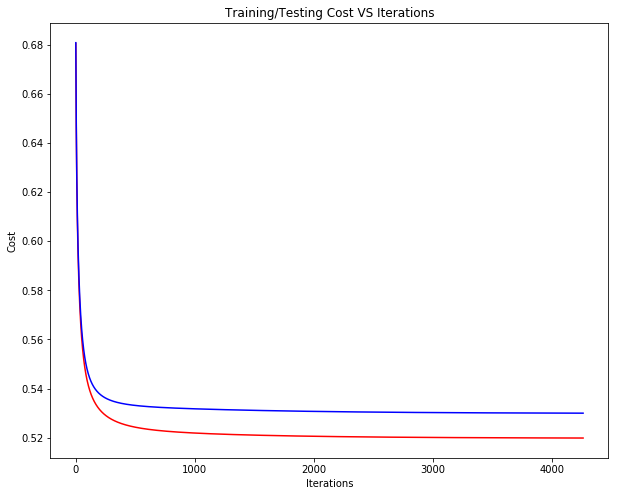

In [103]:
plotLearningCurve(trainCost,testCost)

### Calculating accuracy

In [104]:
predictions

matrix([[0.70513425],
        [0.67874252],
        [0.64150513],
        ...,
        [0.52123503],
        [0.35076003],
        [0.780393  ]])

In [105]:
predictions_log = np.where(predictions>=0.5,1,0)
predictions_log

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [106]:
accuracy = np.sum(np.where(predictions_log ==yTest,1,0))/len(yTest)*100
accuracy

73.12953892923493

#### For alpha = 0.5

In [107]:
alpha=0.5
iterations=3000
theta=np.zeros((XtrainMatrix.shape[1],1))
theta,trainCost,testCost,predictions= gradientDescent(XtrainMatrix,yTrain,XtestMatrix,yTest,theta,alpha,iterations)
theta


Converged in  1230  iterations.


matrix([[ 0.73179663],
        [ 0.84095466],
        [ 1.28799435],
        [-0.21914923],
        [-0.826864  ],
        [-0.14441923],
        [ 0.16792103],
        [ 0.15230201],
        [ 0.77491454],
        [-1.0262479 ],
        [ 0.15304933],
        [-0.08266082],
        [ 0.00199136],
        [ 0.16702027],
        [ 0.00977944],
        [ 0.15857292],
        [ 0.01286867]])

In [108]:
computeCost(XtrainMatrix,yTrain,theta)

0.5197421277616314

In [109]:
computeCost(XtestMatrix,yTest,theta)

0.5298560713964995

#### Cost function got better (i.e. value got decreased) after increasing the value of alpha from 0.1 to 0.5

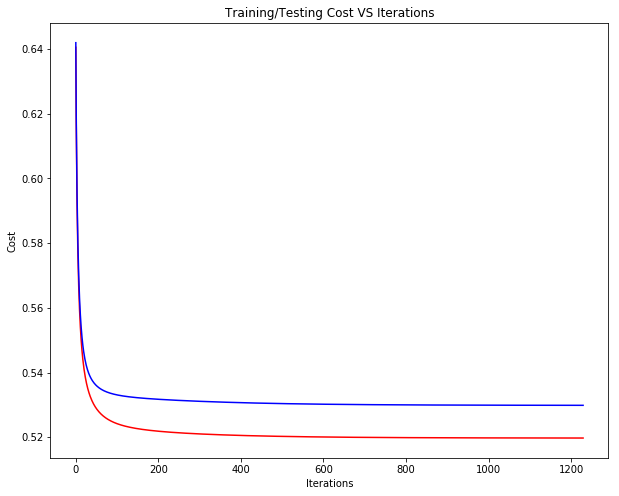

In [110]:
plotLearningCurve(trainCost,testCost)

### Calculating accuracy

In [111]:
predictions

matrix([[0.71018411],
        [0.67723231],
        [0.63230348],
        ...,
        [0.52498515],
        [0.35182241],
        [0.78086051]])

In [112]:
predictions_log = np.where(predictions>=0.5,1,0)
predictions_log

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [113]:
accuracy = np.sum(np.where(predictions_log ==yTest,1,0))/len(yTest)*100
accuracy

73.02820469515284

#### For alpha = 1

In [114]:
alpha=1
iterations=3000
theta=np.zeros((XtrainMatrix.shape[1],1))
theta,trainCost,testCost,predictions= gradientDescent(XtrainMatrix,yTrain,XtestMatrix,yTest,theta,alpha,iterations)
theta


Converged in  697  iterations.


matrix([[ 0.73244932],
        [ 0.84088339],
        [ 1.30595134],
        [-0.23396458],
        [-0.8461508 ],
        [-0.13876631],
        [ 0.16745432],
        [ 0.15304804],
        [ 0.77883732],
        [-1.02694875],
        [ 0.15657687],
        [-0.08210387],
        [ 0.0051749 ],
        [ 0.16741418],
        [ 0.00965766],
        [ 0.15846937],
        [ 0.01286655]])

In [116]:
computeCost(XtrainMatrix,yTrain,theta)

0.5197301895187854

In [117]:
computeCost(XtestMatrix,yTest,theta)

0.5298433769933901

#### Cost function got better (i.e. value got decreased) after increasing the value of alpha from 0.5 to 1

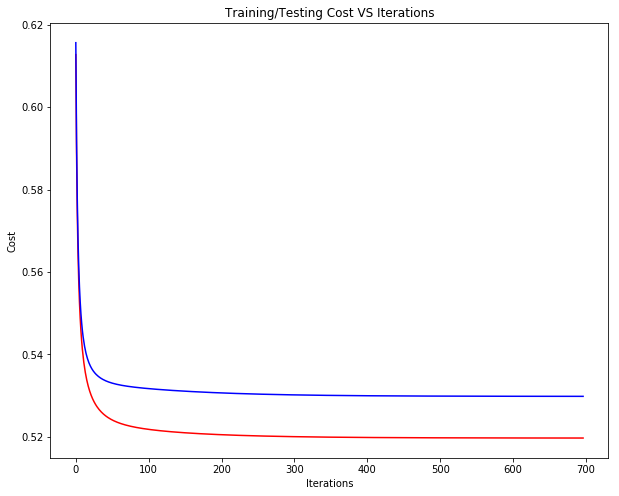

In [118]:
plotLearningCurve(trainCost,testCost)

### Calculating accuracy

In [119]:
predictions

matrix([[0.71143786],
        [0.6768622 ],
        [0.63008448],
        ...,
        [0.52588954],
        [0.35208346],
        [0.78097432]])

In [120]:
predictions_log = np.where(predictions>=0.5,1,0)
predictions_log

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [121]:
accuracy = np.sum(np.where(predictions_log ==yTest,1,0))/len(yTest)*100
accuracy

73.09576085120757

### For Experiment 1, the best results are obtained for a value of alpha =1. The train cost and test cost are as low as 0.51973 and 0.52984 respectively.
### Also, it is observed that for a fixed threshold of 0.0000001, the costs decrease as we increase the value of alpha.
### Accuracy is around 73.1 % for all values of alpha

## Experiment 3:

### Here we will pick the 10 random features and retrain the model again

In [122]:
df_Energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

### By using the following 'np.random' we will pick the 10 random features

In [127]:
df_exp3_cols = np.random.choice(df_Energy.columns,10,replace=False)

In [128]:
df_exp3_cols

array(['RH_5', 'T6', 'T9', 'T5', 'Visibility', 'RH_7', 'T_out', 'RH_8',
       'RH_3', 'RH_out'], dtype=object)

### Finally we have the following dataset with 10 randomly selected features: 

In [132]:
df_exp3=df_Energy[['RH_5', 'T6', 'T9', 'T5', 'Visibility', 'RH_7', 'T_out', 'RH_8',
       'RH_3', 'RH_out','Appliances']]

df_exp3['Appliances_Energy'] = np.where(df_exp3['Appliances']>= 60, 1, 0)
df_exp3.drop(columns=['Appliances'],axis=1,inplace=True)

df_exp3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 11 columns):
RH_5                 19735 non-null float64
T6                   19735 non-null float64
T9                   19735 non-null float64
T5                   19735 non-null float64
Visibility           19735 non-null float64
RH_7                 19735 non-null float64
T_out                19735 non-null float64
RH_8                 19735 non-null float64
RH_3                 19735 non-null float64
RH_out               19735 non-null float64
Appliances_Energy    19735 non-null int32
dtypes: float64(10), int32(1)
memory usage: 1.6 MB


## Note: After selecting the 10 random feature for our model, we will follow the same steps to retrain our model as we did for Experiment 1.

In [133]:
df_exp3.head()

,RH_5,T6,T9,T5,Visibility,RH_7,T_out,RH_8,RH_3,RH_out,Appliances_Energy
0,55.20,7.026667,17.033333,17.166667,63.000000,41.626667,6.60,48.900000,44.730000,92.0,1
1,55.20,6.833333,17.066667,17.166667,59.166667,41.560000,6.48,48.863333,44.790000,92.0,1
2,55.09,6.560000,17.000000,17.166667,55.333333,41.433333,6.37,48.730000,44.933333,92.0,0
3,55.09,6.433333,17.000000,17.166667,51.500000,41.290000,6.25,48.590000,45.000000,92.0,0
4,55.09,6.366667,17.000000,17.200000,47.666667,41.230000,6.13,48.590000,45.000000,92.0,1


### Partitioning the dataset:

### Partitioning dataset using 70/30 split rule 

In [134]:
x = df_exp3.drop(columns=['Appliances_Energy'],axis=1)

y = df_exp3['Appliances_Energy']

xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [135]:
print('Shape of xTrain Set', xTrain.shape)
print('Shape of yTrain Set', yTrain.shape)

print('')

print('Shape of xTest Set', xTest.shape)
print('Shape of yTest Set', yTest.shape)

Shape of xTrain Set (13814, 10)
Shape of yTrain Set (13814,)

Shape of xTest Set (5921, 10)
Shape of yTest Set (5921,)


In [136]:
xTrain.head()

,RH_5,T6,T9,T5,Visibility,RH_7,T_out,RH_8,RH_3,RH_out
3766,56.982222,10.033333,18.700000,19.100000,40.0,39.632778,11.60,49.487778,44.500000,63.333333
9503,39.700000,10.426667,20.100000,18.666667,25.5,23.730000,10.10,32.663333,33.626667,49.000000
10946,46.223333,12.793333,20.390000,20.100000,40.0,31.790000,12.30,36.530000,37.560000,55.333333
10393,43.830000,7.866667,19.463333,20.790000,40.0,35.230000,7.33,39.000000,38.400000,81.500000
15274,44.090000,6.466667,19.390000,19.500000,40.0,28.566667,6.70,37.590000,36.326667,58.666667


In [137]:
yTrain.head()

3766     1
9503     1
10946    1
10393    1
15274    1
Name: Appliances_Energy, dtype: int32

### Converting the dataframes to the Arrays so that we can further Normalize it

In [138]:
xTrain_matrix=np.array(xTrain)
xTest_matrix=np.array(xTest)
yTrain_vector=np.array(yTrain)
yTest_vector=np.array(yTest)

In [139]:
yTrain_vector.shape

(13814,)

In [140]:
yTest_vector.shape

(5921,)

In [141]:
xTrain_matrix.shape

(13814, 10)

In [142]:
xTest_matrix.shape

(5921, 10)

### Due to varying magnitude of features, we need to perform Feature Normalisation. The method below subtracts the mean and divides the value by standard deviation to scale the values

#### Normalising "xTrain" using Standard Scaler

In [144]:
xTrain_matrix=normaliseData(xTrain_matrix)
xTrain_matrix

array([[ 0.67543849,  0.35619039, -0.38627799, ...,  1.2510751 ,
         1.61300402, -1.11443746],
       [-1.25916527,  0.42103043,  0.30996359, ..., -1.97735264,
        -1.73460697, -2.08035676],
       [-0.52893133,  0.81116969,  0.45418505, ..., -1.2353814 ,
        -0.52363794, -1.65355521],
       ...,
       [-0.73303862, -0.36529249, -0.04313035, ..., -0.1301001 ,
        -1.02444548,  0.03118775],
       [ 0.05428565,  1.17987876,  0.26023204, ..., -0.07253337,
        -0.2988903 , -0.5640881 ],
       [ 1.17563194, -0.32517958, -1.55165376, ...,  1.35917263,
         1.66329002,  0.09857747]])

#### Normalising "xTest" using Standard Scaler

In [145]:
xTest_matrix=normaliseData(xTest_matrix)
xTest_matrix

array([[-1.25612905,  0.36826999, -0.35436937, ..., -1.5980522 ,
        -0.29665236, -2.50247733],
       [-0.396888  , -0.16279796,  0.54012447, ..., -1.01557424,
        -0.39760088, -0.2972224 ],
       [-0.31016897,  0.4930357 ,  0.12500026, ..., -0.30492574,
         0.0408624 , -0.76265309],
       ...,
       [-0.8619188 , -0.94014258, -0.64594471, ..., -1.07775598,
        -1.3061376 ,  0.56714887],
       [ 0.59116694, -0.95587391, -0.60146711, ...,  1.09035644,
         1.4959487 ,  0.79986422],
       [-1.42667648, -0.78228683, -0.55204757, ..., -2.21415907,
        -1.35814138, -1.32781893]])

### Part 3: Implementation of Gradient Descent:


#### Add column of ones for bias initialisation

In [146]:
XtrainNorm=np.hstack((np.ones((xTrain_matrix.shape[0],1)),xTrain_matrix))
XtestNorm=np.hstack((np.ones((xTest_matrix.shape[0],1)),xTest_matrix))

#### Normalized Value for xTrain:

In [147]:
XtrainNorm

array([[ 1.        ,  0.67543849,  0.35619039, ...,  1.2510751 ,
         1.61300402, -1.11443746],
       [ 1.        , -1.25916527,  0.42103043, ..., -1.97735264,
        -1.73460697, -2.08035676],
       [ 1.        , -0.52893133,  0.81116969, ..., -1.2353814 ,
        -0.52363794, -1.65355521],
       ...,
       [ 1.        , -0.73303862, -0.36529249, ..., -0.1301001 ,
        -1.02444548,  0.03118775],
       [ 1.        ,  0.05428565,  1.17987876, ..., -0.07253337,
        -0.2988903 , -0.5640881 ],
       [ 1.        ,  1.17563194, -0.32517958, ...,  1.35917263,
         1.66329002,  0.09857747]])

In [148]:
XtrainNorm.shape

(13814, 11)

#### Normalized Value for xTest:

In [149]:
XtestNorm

array([[ 1.        , -1.25612905,  0.36826999, ..., -1.5980522 ,
        -0.29665236, -2.50247733],
       [ 1.        , -0.396888  , -0.16279796, ..., -1.01557424,
        -0.39760088, -0.2972224 ],
       [ 1.        , -0.31016897,  0.4930357 , ..., -0.30492574,
         0.0408624 , -0.76265309],
       ...,
       [ 1.        , -0.8619188 , -0.94014258, ..., -1.07775598,
        -1.3061376 ,  0.56714887],
       [ 1.        ,  0.59116694, -0.95587391, ...,  1.09035644,
         1.4959487 ,  0.79986422],
       [ 1.        , -1.42667648, -0.78228683, ..., -2.21415907,
        -1.35814138, -1.32781893]])

In [150]:
XtestNorm.shape

(5921, 11)

#### Transforming the X values into Matrix and transposing the Y matrix for Test and Train

In [151]:
# For TRAIN:

XtrainMatrix= np.matrix(XtrainNorm) 
yTrain = np.matrix(yTrain_vector).T

In [152]:
#For TEST:

XtestMatrix = np.matrix(XtestNorm)  
yTest = np.matrix(yTest_vector).T

In [153]:
yTrain.shape

(13814, 1)

In [154]:
XtrainMatrix.shape

(13814, 11)

### Lets retrain the model now: 

#### For alpha = 0.01

In [155]:
alpha=0.01
iterations=100000
theta=np.zeros((XtrainMatrix.shape[1],1))
theta,trainCost,testCost,predictions= gradientDescent(XtrainMatrix,yTrain,XtestMatrix,yTest,theta,alpha,iterations)
theta


Converged in  13142  iterations.


matrix([[ 0.58505769],
        [ 0.26513721],
        [ 0.5912373 ],
        [-0.47890857],
        [ 0.59584071],
        [ 0.02492275],
        [-0.15739773],
        [ 0.14578695],
        [-1.07664697],
        [ 0.53057478],
        [ 0.17297357]])

In [156]:
computeCost(XtrainMatrix,yTrain,theta)

0.5815323705515747

In [157]:
computeCost(XtestMatrix,yTest,theta)

0.5859483624083061

### Plotting the Learning Curve

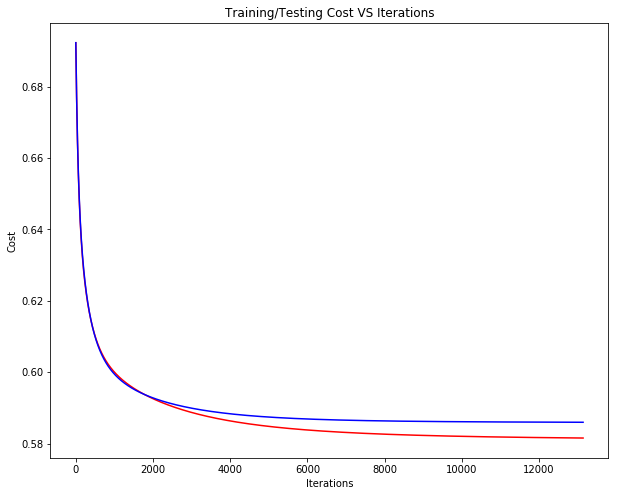

In [158]:
plotLearningCurve(trainCost,testCost)

### Calculating accuracy

In [159]:
predictions

matrix([[0.88539129],
        [0.74806315],
        [0.72974803],
        ...,
        [0.54731381],
        [0.43695208],
        [0.82099525]])

In [160]:
predictions_log = np.where(predictions>=0.5,1,0)
predictions_log

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [161]:
accuracy = np.sum(np.where(predictions_log ==yTest,1,0))/len(yTest)*100
accuracy

70.22462421888194

#### For alpha = 0.1

In [162]:
alpha=0.1
iterations=5000
theta=np.zeros((XtrainMatrix.shape[1],1))
theta,trainCost,testCost,predictions= gradientDescent(XtrainMatrix,yTrain,XtestMatrix,yTest,theta,alpha,iterations)
theta


Converged in  2703  iterations.


matrix([[ 0.59056698],
        [ 0.25662235],
        [ 0.71674233],
        [-0.61220271],
        [ 0.71824232],
        [ 0.02341625],
        [-0.1633769 ],
        [ 0.05544115],
        [-1.11137139],
        [ 0.53931516],
        [ 0.19996614]])

In [163]:
computeCost(XtrainMatrix,yTrain,theta)

0.5810476776288467

In [164]:
computeCost(XtestMatrix,yTest,theta)

0.5858184393846191

#### As we can see here that, with slight increase in alpha train and test cost is slightly decreasing, so lets try the same for alpha = 0.5

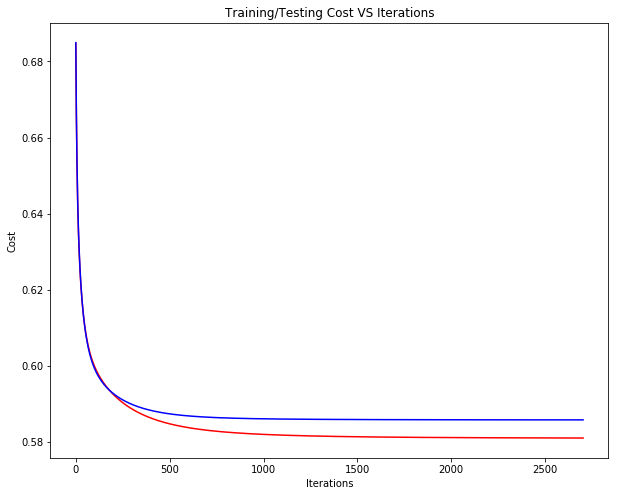

In [165]:
plotLearningCurve(trainCost,testCost)

### Calculating accuracy

In [166]:
predictions

matrix([[0.8894806 ],
        [0.74386616],
        [0.7270683 ],
        ...,
        [0.54918263],
        [0.43079588],
        [0.83274458]])

In [167]:
predictions_log = np.where(predictions>=0.5,1,0)
predictions_log

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [168]:
accuracy = np.sum(np.where(predictions_log ==yTest,1,0))/len(yTest)*100
accuracy

70.14017902381354

#### For alpha = 0.5

In [169]:
alpha=0.5
iterations=3000
theta=np.zeros((XtrainMatrix.shape[1],1))
theta,trainCost,testCost,predictions= gradientDescent(XtrainMatrix,yTrain,XtestMatrix,yTest,theta,alpha,iterations)
theta


Converged in  880  iterations.


matrix([[ 0.59217161],
        [ 0.25371835],
        [ 0.79064026],
        [-0.64307741],
        [ 0.75035916],
        [ 0.02310025],
        [-0.16447977],
        [-0.01756788],
        [-1.10933642],
        [ 0.53848786],
        [ 0.19841473]])

In [170]:
computeCost(XtrainMatrix,yTrain,theta)

0.580967538054929

In [171]:
computeCost(XtestMatrix,yTest,theta)

0.5858371980712488

#### Cost function got better (i.e. value got decreased) after increasing the value of alpha from 0.1 to 0.5

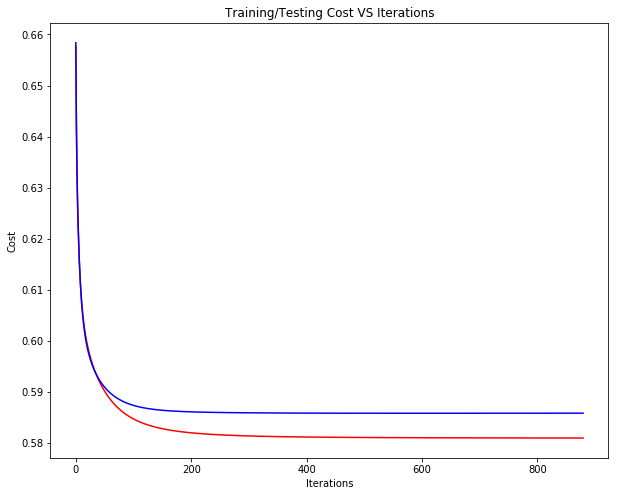

In [172]:
plotLearningCurve(trainCost,testCost)

### Calculating accuracy

In [173]:
predictions

matrix([[0.8902009 ],
        [0.74155866],
        [0.72635786],
        ...,
        [0.5497102 ],
        [0.42907335],
        [0.83537736]])

In [174]:
predictions_log = np.where(predictions>=0.5,1,0)
predictions_log

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [175]:
accuracy = np.sum(np.where(predictions_log ==yTest,1,0))/len(yTest)*100
accuracy

70.10640094578619

#### For alpha = 1

In [176]:
alpha=1
iterations=3000
theta=np.zeros((XtrainMatrix.shape[1],1))
theta,trainCost,testCost,predictions= gradientDescent(XtrainMatrix,yTrain,XtestMatrix,yTest,theta,alpha,iterations)
theta


Converged in  527  iterations.


matrix([[ 0.59250879],
        [ 0.25321514],
        [ 0.8128284 ],
        [-0.64669718],
        [ 0.75515726],
        [ 0.02310503],
        [-0.16420758],
        [-0.04130468],
        [-1.10785535],
        [ 0.5384964 ],
        [ 0.19663451]])

In [177]:
computeCost(XtrainMatrix,yTrain,theta)

0.5809549491146615

In [178]:
computeCost(XtestMatrix,yTest,theta)

0.5858544858828878

#### Cost function got better (i.e. value got decreased) after increasing the value of alpha from 0.5 to 1

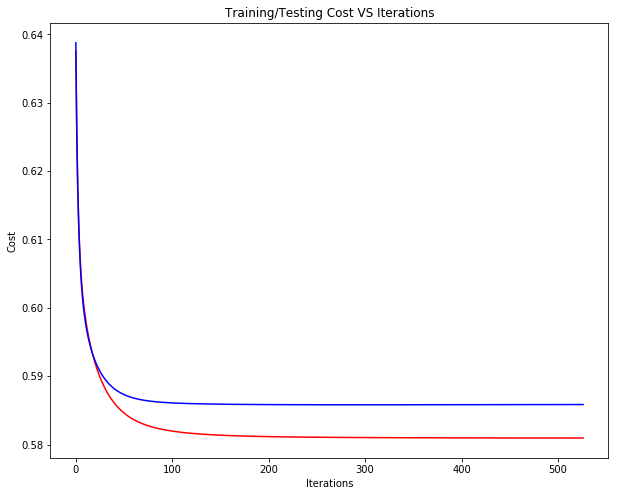

In [179]:
plotLearningCurve(trainCost,testCost)

### Calculating accuracy

In [180]:
predictions

matrix([[0.89024011],
        [0.74110138],
        [0.72629385],
        ...,
        [0.54984859],
        [0.42877451],
        [0.83574903]])

In [181]:
predictions_log = np.where(predictions>=0.5,1,0)
predictions_log

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [182]:
accuracy = np.sum(np.where(predictions_log ==yTest,1,0))/len(yTest)*100
accuracy

69.98817767269043

### By taking 10 random features to estimate Appliances as a binary variable using Logistic regression, it is observed that both Train cost and Test Cost are significantly high compared to that in Experiment-1
### The train cost and test cost in this case ranges around 0.5809 and 0.5858 respectively.
### The accuracy of the model built by 10 random features is also low and ranges from 69.98 % - 70.22 % for different values of alpha.
### It is also found that in this case, train cost and test cost decreases with increasing alpha but accuracy decreases at the same time as well.

## Experiment 4:

In [183]:
df_Energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,1/11/2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,1/11/2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,1/11/2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,1/11/2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,1/11/2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [184]:
df_Energy.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


### When we closely observe the summary statistics of the Temperature (T) and Humidity (RH) for the areas/rooms inside the house which was monitored with a ZigBee wireless sensor network. 

### (e.g. 1. Kitchen Area, 2. Living Room, 3.Laundray Room, 4. Office, 5. Bathroom, 7. Ironing Room, 8. Teenager Room, 9. Parents Room
#### the mean values of Temperature and Humidity for these specific areas are almost same

Text(0.5,1,'Heatmap of Variables')

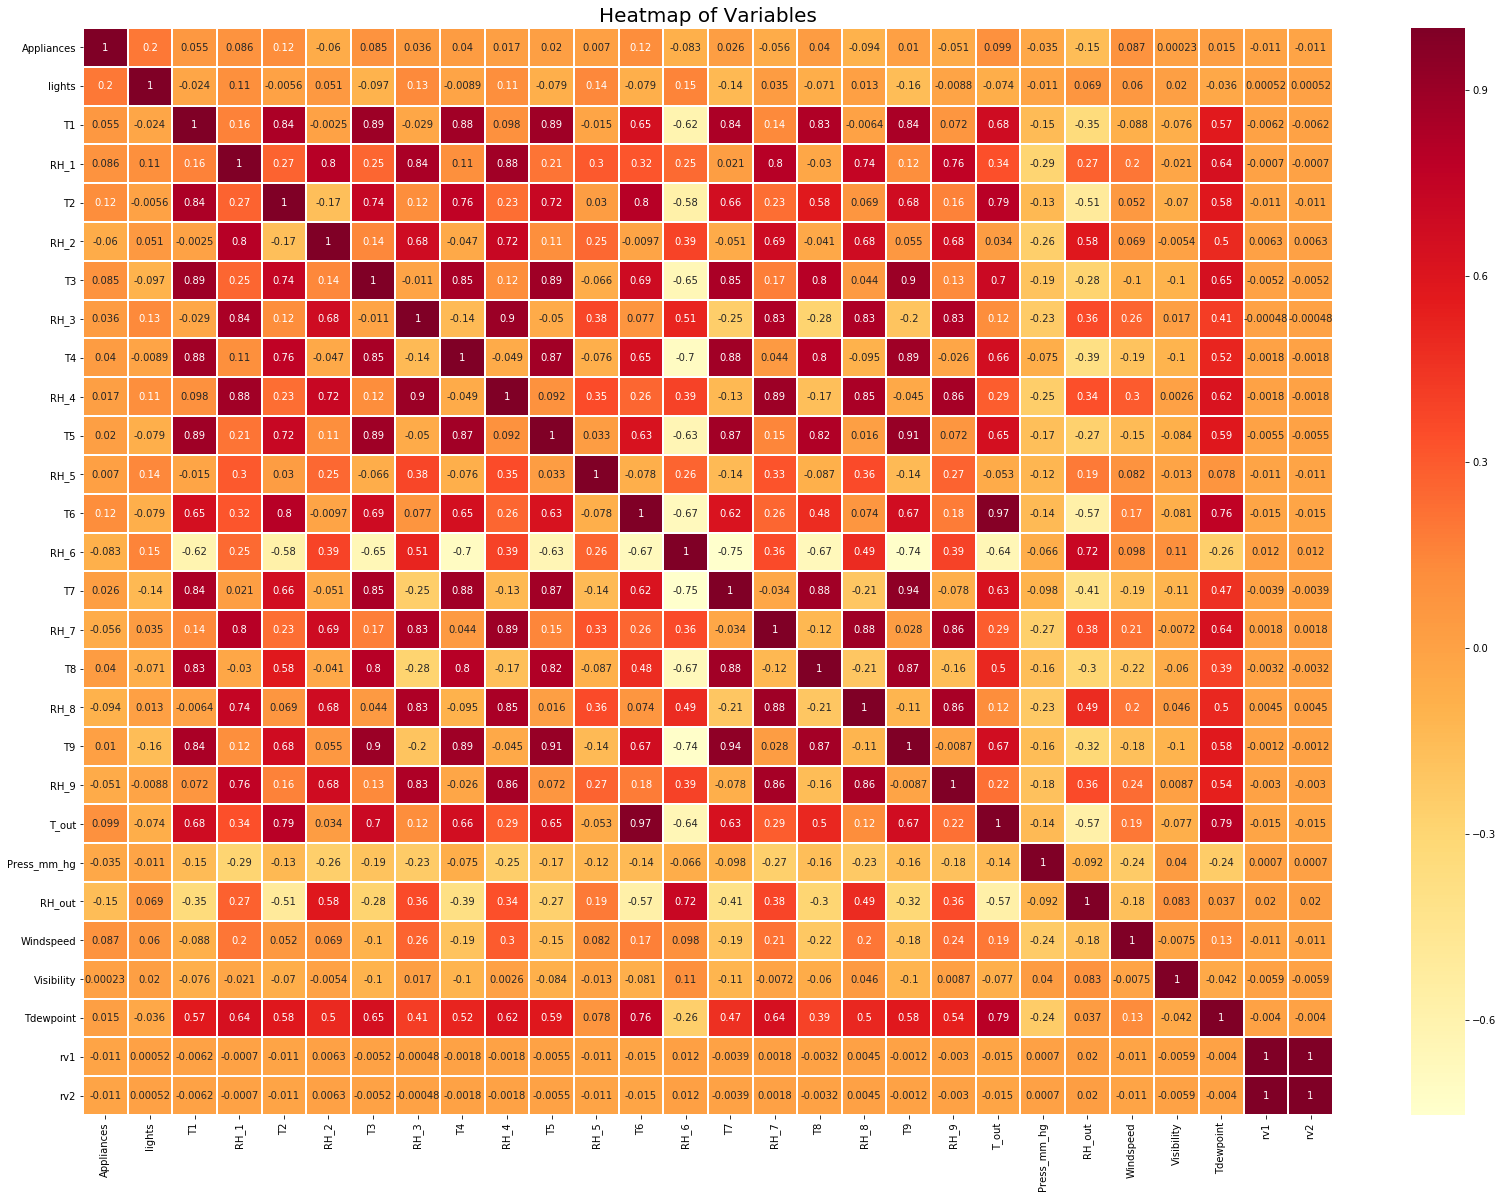

In [185]:
#Correlation:

fig = plt.figure(figsize=(28,20))

axis = sns.heatmap(df_Energy.corr(), cmap= 'YlOrRd', linewidth=1, linecolor='white', annot=True)
axis.set_title('Heatmap of Variables', fontsize=20)

#### Below are are the features from actual dataset:

In [186]:
df_Energy.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

### For the feature selection we are implementing the elimination using correlation backed up by the business logic which is explained in the report:

In [187]:
corr_matrix = df_Energy.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol = sol.to_frame()
sol.columns=['corr']
sol[sol['corr'] >  0.7]

,,corr
rv1,rv2,1.000000
T6,T_out,0.974778
T7,T9,0.944776
T5,T9,0.911055
T3,T9,0.901324
RH_3,RH_4,0.898978
RH_4,RH_7,0.894301
T1,T3,0.892402
T4,T9,0.889439
T3,T5,0.888169


In [188]:
df_Energy.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

### Final 10 Features along with target variable 'Appliances' that we selected for Experiment 4 based upon our analysis: 

In [192]:
df_final = df_Energy[['T1', 
                     'T2', 
                     'T6',
                     'RH_1', 
                     'RH_2',
                     'RH_6', 
                     'T_out',
                     'lights',
                     'Windspeed',
                     'RH_out', 
                     'Appliances']]

df_final['Appliances_Energy'] = np.where(df_final['Appliances']>= 60, 1, 0)
df_final.drop(columns=['Appliances'],axis=1,inplace=True)

In [193]:
df_final.head()

,T1,T2,T6,RH_1,RH_2,RH_6,T_out,lights,Windspeed,RH_out,Appliances_Energy
0,19.89,19.2,7.026667,47.596667,44.790000,84.256667,6.60,30,7.000000,92.0,1
1,19.89,19.2,6.833333,46.693333,44.722500,84.063333,6.48,30,6.666667,92.0,1
2,19.89,19.2,6.560000,46.300000,44.626667,83.156667,6.37,30,6.333333,92.0,0
3,19.89,19.2,6.433333,46.066667,44.590000,83.423333,6.25,40,6.000000,92.0,0
4,19.89,19.2,6.366667,46.333333,44.530000,84.893333,6.13,40,5.666667,92.0,1


Text(0.5,1,'Heatmap of Variables')

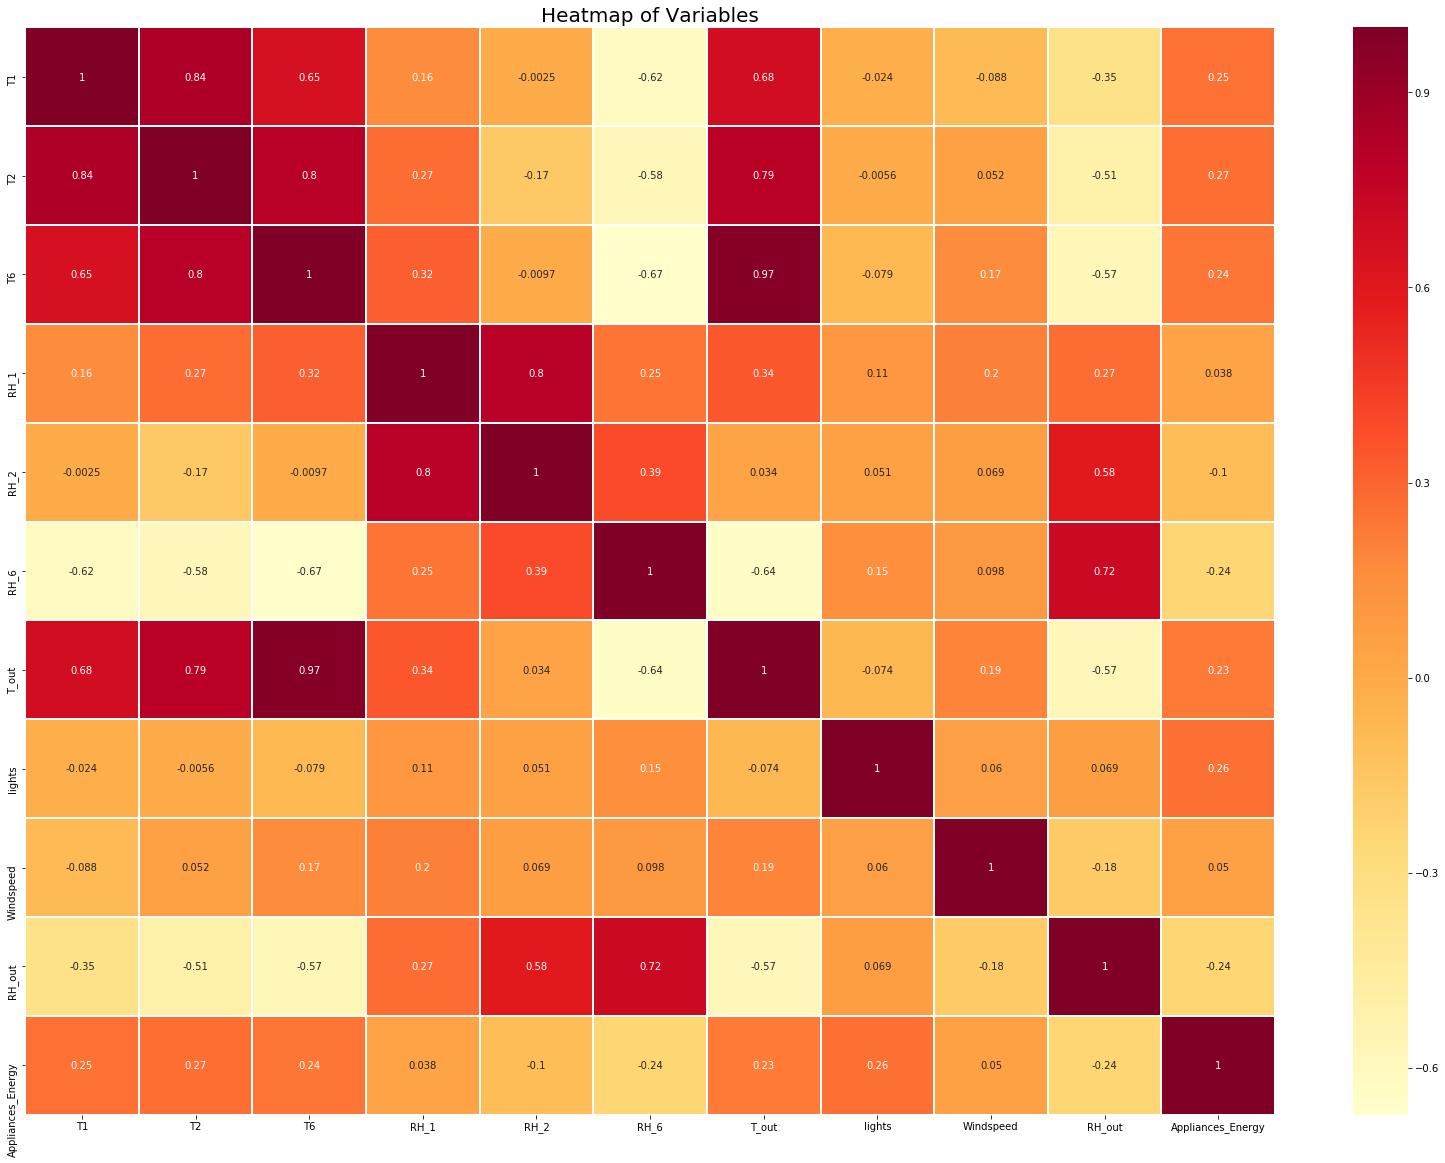

In [194]:
#Correlation:

fig = plt.figure(figsize=(28,20))

axis = sns.heatmap(df_final.corr(), cmap= 'YlOrRd', linewidth=1, linecolor='white', annot=True)
axis.set_title('Heatmap of Variables', fontsize=20)

### In our final dataframe, there is hardly any correlation between features, however there are some exceptions like 0.76 correlation between Tdewpoint and T6(which is outside tempearture) which are not related or depend on each other and have their own significance in the data so we cannot ignore or drop them.   

### Lets start with training the model and implement Gradient Descent:

### We will begin splitting the dataset (70-30 split)

In [195]:
x = df_final.drop(columns=['Appliances_Energy'],axis=1)

y = df_final['Appliances_Energy']

xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [196]:
print('Shape of xTrain Set', xTrain.shape)
print('Shape of yTrain Set', yTrain.shape)

print('')

print('Shape of xTest Set', xTest.shape)
print('Shape of yTest Set', yTest.shape)

Shape of xTrain Set (13814, 10)
Shape of yTrain Set (13814,)

Shape of xTest Set (5921, 10)
Shape of yTest Set (5921,)


In [197]:
xTrain.head()

,T1,T2,T6,RH_1,RH_2,RH_6,T_out,lights,Windspeed,RH_out
3766,22.926667,22.323333,10.033333,44.560000,43.526667,67.960000,11.60,20,9.000000,63.333333
9503,22.790000,21.000000,10.426667,31.700000,31.826667,14.700000,10.10,10,4.833333,49.000000
10946,22.823333,21.356667,12.793333,36.230000,36.400000,20.763333,12.30,0,9.666667,55.333333
10393,22.600000,20.790000,7.866667,39.163333,40.663333,43.766667,7.33,20,2.000000,81.500000
15274,21.463333,19.760000,6.466667,41.360000,40.830000,23.690000,6.70,0,6.666667,58.666667


In [198]:
yTrain.head()

3766     1
9503     1
10946    1
10393    1
15274    1
Name: Appliances_Energy, dtype: int32

### Converting the dataframes to the Arrays so that we can further Normalize it

In [199]:
xTrain_matrix=np.array(xTrain)
xTest_matrix=np.array(xTest)
yTrain_vector=np.array(yTrain)
yTest_vector=np.array(yTest)

In [200]:
yTrain_vector.shape

(13814,)

In [201]:
yTest_vector.shape

(5921,)

In [202]:
xTrain_matrix.shape

(13814, 10)

In [203]:
xTest_matrix.shape

(5921, 10)

### Due to varying magnitude of features, we need to perform Feature Normalisation. The method below subtracts the mean and divides the value by standard deviation to scale the values

#### Normalising "xTrain" using Standard Scaler

In [204]:
xTrain_matrix=normaliseData(xTrain_matrix)
xTrain_matrix

array([[ 0.77734779,  0.9157877 ,  0.35619039, ...,  2.04008149,
         2.02743432, -1.11443746],
       [ 0.69206154,  0.30833191,  0.42103043, ...,  0.77909954,
         0.32574857, -2.08035676],
       [ 0.71286307,  0.47205426,  0.81116969, ..., -0.48188242,
         2.29970404, -1.65355521],
       ...,
       [-0.00894978, -0.60973728, -0.36529249, ..., -0.48188242,
        -0.42299315,  0.03118775],
       [ 0.13042042,  0.21193465,  1.17987876, ..., -0.48188242,
         0.93835544, -0.5640881 ],
       [-0.49362528,  0.12471808, -0.32517958, ..., -0.48188242,
         0.80222058,  0.09857747]])

#### Normalising "xTest" using Standard Scaler

In [205]:
xTest_matrix=normaliseData(xTest_matrix)
xTest_matrix

array([[-0.30945954, -0.24619744,  0.36826999, ..., -0.47256809,
         0.31913429, -2.50247733],
       [ 0.05603127, -0.39145471, -0.16279796, ..., -0.47256809,
        -0.02000479, -0.2972224 ],
       [ 0.42771683, -0.07698021,  0.4930357 , ..., -0.47256809,
         0.7261012 , -0.76265309],
       ...,
       [-1.07554479, -1.159671  , -0.94014258, ..., -0.47256809,
         0.59044556,  0.56714887],
       [-0.43335473, -0.07698021, -0.95587391, ..., -0.47256809,
        -0.02000479,  0.79986422],
       [ 0.01886271, -0.26117242, -0.78228683, ..., -0.47256809,
        -0.42697169, -1.32781893]])

### Part 3: Implementation of Gradient Descent:


#### Add column of ones for bias initialisation

In [206]:
XtrainNorm=np.hstack((np.ones((xTrain_matrix.shape[0],1)),xTrain_matrix))
XtestNorm=np.hstack((np.ones((xTest_matrix.shape[0],1)),xTest_matrix))

#### Normalized Value for xTrain:

In [207]:
XtrainNorm

array([[ 1.        ,  0.77734779,  0.9157877 , ...,  2.04008149,
         2.02743432, -1.11443746],
       [ 1.        ,  0.69206154,  0.30833191, ...,  0.77909954,
         0.32574857, -2.08035676],
       [ 1.        ,  0.71286307,  0.47205426, ..., -0.48188242,
         2.29970404, -1.65355521],
       ...,
       [ 1.        , -0.00894978, -0.60973728, ..., -0.48188242,
        -0.42299315,  0.03118775],
       [ 1.        ,  0.13042042,  0.21193465, ..., -0.48188242,
         0.93835544, -0.5640881 ],
       [ 1.        , -0.49362528,  0.12471808, ..., -0.48188242,
         0.80222058,  0.09857747]])

In [208]:
XtrainNorm.shape

(13814, 11)

#### Normalized Value for xTest:

In [209]:
XtestNorm

array([[ 1.        , -0.30945954, -0.24619744, ..., -0.47256809,
         0.31913429, -2.50247733],
       [ 1.        ,  0.05603127, -0.39145471, ..., -0.47256809,
        -0.02000479, -0.2972224 ],
       [ 1.        ,  0.42771683, -0.07698021, ..., -0.47256809,
         0.7261012 , -0.76265309],
       ...,
       [ 1.        , -1.07554479, -1.159671  , ..., -0.47256809,
         0.59044556,  0.56714887],
       [ 1.        , -0.43335473, -0.07698021, ..., -0.47256809,
        -0.02000479,  0.79986422],
       [ 1.        ,  0.01886271, -0.26117242, ..., -0.47256809,
        -0.42697169, -1.32781893]])

In [210]:
XtestNorm.shape

(5921, 11)

#### Transforming the X values into Matrix and transposing the Y matrix for Test and Train

In [211]:
# For TRAIN:

XtrainMatrix= np.matrix(XtrainNorm) 
yTrain = np.matrix(yTrain_vector).T

In [212]:
#For TEST:

XtestMatrix = np.matrix(XtestNorm)  
yTest = np.matrix(yTest_vector).T

In [213]:
yTrain.shape

(13814, 1)

In [214]:
XtrainMatrix.shape

(13814, 11)

### Lets retrain the model now: 

#### For alpha = 0.01

In [215]:
alpha=0.01
iterations=100000
theta=np.zeros((XtrainMatrix.shape[1],1))
theta,trainCost,testCost,predictions= gradientDescent(XtrainMatrix,yTrain,XtestMatrix,yTest,theta,alpha,iterations)
theta


Converged in  31722  iterations.


matrix([[ 0.68520178],
        [ 0.70358526],
        [-0.53439304],
        [ 0.68678422],
        [ 0.72665404],
        [-0.64749035],
        [-0.32359356],
        [-0.66967019],
        [ 0.90380041],
        [ 0.06978496],
        [-0.25396754]])

In [216]:
computeCost(XtrainMatrix,yTrain,theta)

0.5544424266452228

In [217]:
computeCost(XtestMatrix,yTest,theta)

0.5586962231693122

### Plotting the Learning Curve

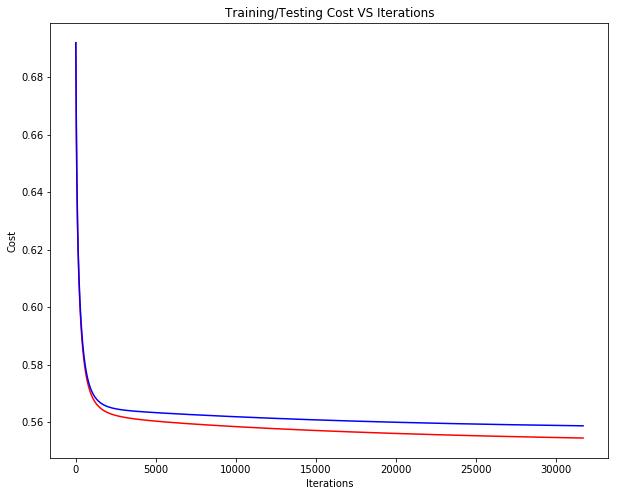

In [218]:
plotLearningCurve(trainCost,testCost)

### Calculating accuracy

In [219]:
predictions

matrix([[0.80563975],
        [0.58012213],
        [0.65825056],
        ...,
        [0.37511389],
        [0.35832833],
        [0.64893259]])

In [220]:
predictions_log = np.where(predictions>=0.5,1,0)
predictions_log

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [221]:
accuracy = np.sum(np.where(predictions_log ==yTest,1,0))/len(yTest)*100
accuracy

69.5828407363621

#### For alpha = 0.1

In [222]:
alpha=0.1
iterations=5000
theta=np.zeros((XtrainMatrix.shape[1],1))
theta,trainCost,testCost,predictions= gradientDescent(XtrainMatrix,yTrain,XtestMatrix,yTest,theta,alpha,iterations)
theta

matrix([[ 0.69025285],
        [ 0.8729467 ],
        [-0.77074022],
        [ 0.89688085],
        [ 0.89705803],
        [-0.82180655],
        [-0.2951908 ],
        [-0.83910176],
        [ 0.90003332],
        [ 0.06935   ],
        [-0.26161818]])

In [223]:
computeCost(XtrainMatrix,yTrain,theta)

0.5532321994614945

In [224]:
computeCost(XtestMatrix,yTest,theta)

0.5578775732690602

#### As we can see here that, with slight increase in alpha train and test cost is slightly decreasing, so lets try the same for alpha = 0.5

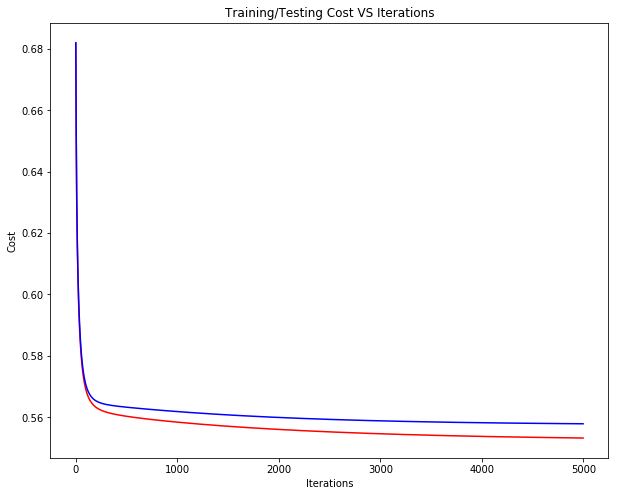

In [225]:
plotLearningCurve(trainCost,testCost)

### Calculating accuracy

In [226]:
predictions

matrix([[0.81376678],
        [0.57932255],
        [0.66186738],
        ...,
        [0.3854311 ],
        [0.34628528],
        [0.65776949]])

In [227]:
predictions_log = np.where(predictions>=0.5,1,0)
predictions_log

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [228]:
accuracy = np.sum(np.where(predictions_log ==yTest,1,0))/len(yTest)*100
accuracy

69.6672859314305

#### For alpha = 0.5

In [229]:
alpha=0.5
iterations=3000
theta=np.zeros((XtrainMatrix.shape[1],1))
theta,trainCost,testCost,predictions= gradientDescent(XtrainMatrix,yTrain,XtestMatrix,yTest,theta,alpha,iterations)
theta


Converged in  2332  iterations.


matrix([[ 0.70019835],
        [ 1.1258783 ],
        [-1.12686218],
        [ 1.19138816],
        [ 1.16324756],
        [-1.09345965],
        [-0.25898552],
        [-1.07415605],
        [ 0.89567909],
        [ 0.06857692],
        [-0.26924488]])

In [230]:
computeCost(XtrainMatrix,yTrain,theta)

0.5523805521720911

In [231]:
computeCost(XtestMatrix,yTest,theta)

0.5576095017021084

#### Cost function got better (i.e. value got decreased) after increasing the value of alpha from 0.1 to 0.5

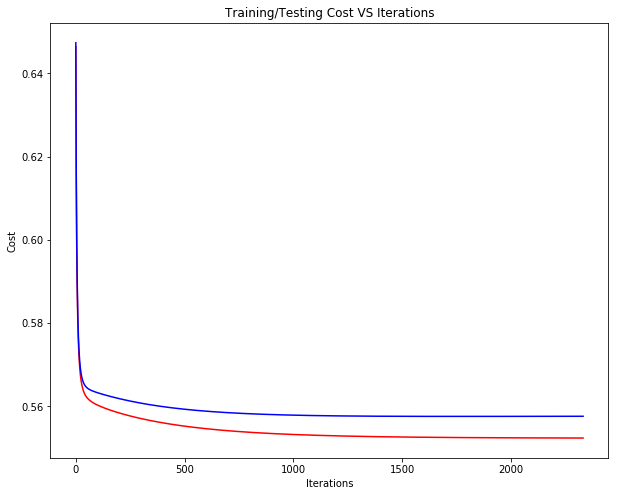

In [232]:
plotLearningCurve(trainCost,testCost)

### Calculating accuracy

In [233]:
predictions

matrix([[0.82651912],
        [0.57812573],
        [0.66607166],
        ...,
        [0.40005144],
        [0.3292901 ],
        [0.67020074]])

In [234]:
predictions_log = np.where(predictions>=0.5,1,0)
predictions_log

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [235]:
accuracy = np.sum(np.where(predictions_log ==yTest,1,0))/len(yTest)*100
accuracy

69.78550920452626

#### For alpha = 1

In [236]:
alpha=1
iterations=3000
theta=np.zeros((XtrainMatrix.shape[1],1))
theta,trainCost,testCost,predictions= gradientDescent(XtrainMatrix,yTrain,XtestMatrix,yTest,theta,alpha,iterations)
theta


Converged in  1323  iterations.


matrix([[ 0.70119064],
        [ 1.14791886],
        [-1.15827529],
        [ 1.21493266],
        [ 1.18744311],
        [-1.11818034],
        [-0.25638087],
        [-1.09255105],
        [ 0.89536108],
        [ 0.06850716],
        [-0.26946554]])

In [237]:
computeCost(XtrainMatrix,yTrain,theta)

0.5523577837728425

In [238]:
computeCost(XtestMatrix,yTest,theta)

0.5576354284140494

#### Cost function got better (i.e. value got decreased) after increasing the value of alpha from 0.5 to 1

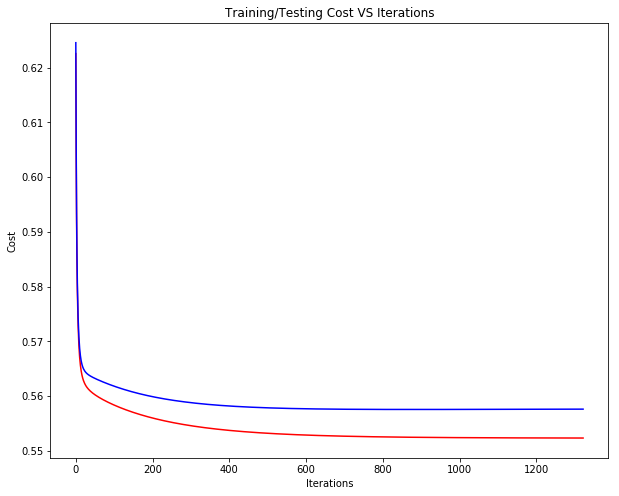

In [239]:
plotLearningCurve(trainCost,testCost)

### Calculating accuracy

In [240]:
predictions

matrix([[0.82768115],
        [0.5780146 ],
        [0.66630186],
        ...,
        [0.40125599],
        [0.32788487],
        [0.67118848]])

In [241]:
predictions_log = np.where(predictions>=0.5,1,0)
predictions_log

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [242]:
accuracy = np.sum(np.where(predictions_log ==yTest,1,0))/len(yTest)*100
accuracy

69.78550920452626

### The performance of the model is certainly better in terms of both Train cost and Test cost than the last experiment where we had randomly selected 10 features for our model.
### The best results are obtained for alpha=1, where the train cost is 0.5524 and the test cost is 0.5576